# Logistic Regression
# $ln(\frac{p}{1-p}) = \beta_0 + \beta_1x$
# $p = \frac{e^{\beta_0 + \beta_1x}}{1+e^{\beta_0 + \beta_1x}}$

# $\text{Likelihood} = \prod_{i=1}^{N} p_{i}^{y_i}(1-p_{i})^{1-y_i} $

# $LL = log(\text{Likelihood}) = \sum_{i=1}^{N} y_ilog(p_i) + (1-y_i)log(1-p_i)$

# $\frac{\partial LL}{\partial \beta_0} = \sum_{i=1}^{N} (y_i - p_i) $
# $\frac{\partial LL}{\partial \beta_1} = \sum_{i=1}^{N} (y_i - p_i) x_i $

# Goal: Maximize Log Likelihood

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
class_1 = np.random.random(20) * 2 + 1
class_2 = np.random.random(20) * 2 - 0.5

In [3]:
data = pd.DataFrame()
data["x"] = np.concatenate([class_1, class_2])
data["y"] = [0] * 20 + [1] * 20
data = data.sample(frac=1)

In [4]:
data.head()

,x,y
15,1.006438,0
29,-0.169539,1
28,0.526729,1
16,2.320624,0
19,1.071889,0


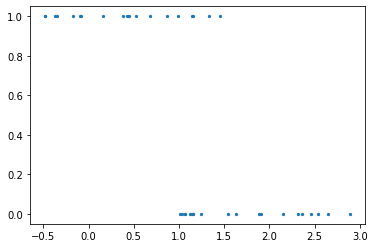

In [5]:
plt.scatter(data.x, data.y, s=5)

In [6]:
def calculate_gradient_log_likelihood(curr_betas, data):
    numerator = np.exp(curr_betas[0] + curr_betas[1] * data.x)
    p = numerator / (1 + numerator)

    partial_0 = np.sum(data.y - p)
    partial_1 = np.sum((data.y - p) * data.x)

    return np.array([partial_0, partial_1])

In [9]:
curr_betas = np.array([0.0, 0.0])
diff = np.inf
eta = 0.1

while diff > 0.001:
    grad = calculate_gradient_log_likelihood(curr_betas, data)
    diff = abs(grad).sum()
    curr_betas += eta * grad

print(curr_betas)

[ 4.75895281 -4.53975383]


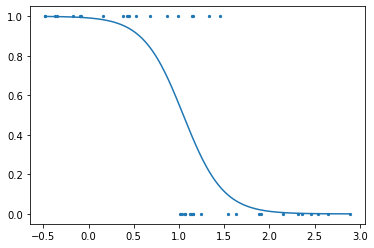

In [10]:
plt.scatter(data.x, data.y, s=5)

x_vals = np.arange(data.x.min(), data.x.max(), 0.01)
p_vals = 1 / (1 + np.exp(-(curr_betas[0] + curr_betas[1] * x_vals)))
plt.plot(x_vals, p_vals)

# Built-In Solution

In [11]:
clf = LogisticRegression(penalty="none")
clf.fit(np.array(data.x).reshape(-1, 1), data.y)
print("beta_0: %s" % clf.intercept_[0])
print("beta_1: %s" % clf.coef_[0][0])

beta_0: 4.762400677195888
beta_1: -4.542858551887141


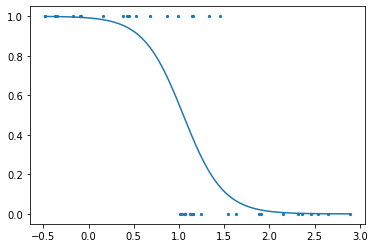

In [12]:
plt.scatter(data.x, data.y, s=5)

x_vals = np.arange(data.x.min(), data.x.max(), 0.01)
p_vals = 1 / (1 + np.exp(-(clf.intercept_[0] + clf.coef_[0][0] * x_vals)))
plt.plot(x_vals, p_vals)